In [4]:
import numpy as np 
import pandas as pd
import plotly
# import pandas_profiling
# import warnings
# warnings.filterwarnings('ignore')
import datetime
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import cufflinks as cf
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg

In [5]:
data = pd.read_csv("daily-website-visitors.csv") 
print(data)

       Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0        1     Sunday            1  9/14/2014      2,146         1,582   
1        2     Monday            2  9/15/2014      3,621         2,528   
2        3    Tuesday            3  9/16/2014      3,698         2,630   
3        4  Wednesday            4  9/17/2014      3,667         2,614   
4        5   Thursday            5  9/18/2014      3,316         2,366   
...    ...        ...          ...        ...        ...           ...   
2162  2163   Saturday            7  8/15/2020      2,221         1,696   
2163  2164     Sunday            1  8/16/2020      2,724         2,037   
2164  2165     Monday            2  8/17/2020      3,456         2,638   
2165  2166    Tuesday            3  8/18/2020      3,581         2,683   
2166  2167  Wednesday            4  8/19/2020      2,064         1,564   

     First.Time.Visits Returning.Visits  
0                1,430              152  
1                2,297     

In [6]:
#preprocessing of data
#processing of column names
data.rename(columns = {'Day.Of.Week':'day_of_week'
                    ,'Page.Loads':'page_loads'
                    ,'Unique.Visits':'unique_visits'
                    ,'First.Time.Visits':'first_visits'
                    ,'Returning.Visits':'returning_visits'}, inplace = True) 

data = data.replace(",","",regex=True)

data['page_loads']=data['page_loads'].astype(int)
data['unique_visits']=data['unique_visits'].astype(int)
data['first_visits']=data['first_visits'].astype(int)
data['returning_visits']=data['returning_visits'].astype(int)

data


Row        Day  day_of_week       Date  page_loads  unique_visits  \
0        1     Sunday            1  9/14/2014        2146           1582   
1        2     Monday            2  9/15/2014        3621           2528   
2        3    Tuesday            3  9/16/2014        3698           2630   
3        4  Wednesday            4  9/17/2014        3667           2614   
4        5   Thursday            5  9/18/2014        3316           2366   
...    ...        ...          ...        ...         ...            ...   
2162  2163   Saturday            7  8/15/2020        2221           1696   
2163  2164     Sunday            1  8/16/2020        2724           2037   
2164  2165     Monday            2  8/17/2020        3456           2638   
2165  2166    Tuesday            3  8/18/2020        3581           2683   
2166  2167  Wednesday            4  8/19/2020        2064           1564   

      first_visits  returning_visits  
0             1430               152  
1             2297               231  
2             2352               278  
3             2327               287  
4             2130               236  
...            ...               ...  
2162          1373               323  
2163          1686               351  
2164          2181               457  
2165          2184               499  
2166          1297               267  

[2167 rows x 8 columns]

In [7]:
#Feature Engineering and Feature Selection
#============================================#
# Importing the necessary libraries

data.isna().sum() 


Row                 0
Day                 0
day_of_week         0
Date                0
page_loads          0
unique_visits       0
first_visits        0
returning_visits    0
dtype: int64

In [8]:
data.info

<bound method DataFrame.info of        Row        Day  day_of_week       Date  page_loads  unique_visits  \
0        1     Sunday            1  9/14/2014        2146           1582   
1        2     Monday            2  9/15/2014        3621           2528   
2        3    Tuesday            3  9/16/2014        3698           2630   
3        4  Wednesday            4  9/17/2014        3667           2614   
4        5   Thursday            5  9/18/2014        3316           2366   
...    ...        ...          ...        ...         ...            ...   
2162  2163   Saturday            7  8/15/2020        2221           1696   
2163  2164     Sunday            1  8/16/2020        2724           2037   
2164  2165     Monday            2  8/17/2020        3456           2638   
2165  2166    Tuesday            3  8/18/2020        3581           2683   
2166  2167  Wednesday            4  8/19/2020        2064           1564   

      first_visits  returning_visits  
0             14

In [9]:
data.duplicated().sum()

0

In [10]:
px.line(data,x='Date',y=['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits'],
       labels={'value':'Visits'}
       ,title='Page Loads & visitors over Time')

In [11]:
px.histogram(data,x='unique_visits',color='Day',title='unique visits for each day')

In [12]:
px.density_heatmap(data, x='Date',y=['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits']
#                    color_continuous_scale="Viridis"
                   ,marginal_x="histogram", marginal_y="histogram",title='Correlation for each data point')

In [13]:
filter_data = data[['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits','Day']] 
filter_data

page_loads  unique_visits  first_visits  returning_visits        Day
0           2146           1582          1430               152     Sunday
1           3621           2528          2297               231     Monday
2           3698           2630          2352               278    Tuesday
3           3667           2614          2327               287  Wednesday
4           3316           2366          2130               236   Thursday
...          ...            ...           ...               ...        ...
2162        2221           1696          1373               323   Saturday
2163        2724           2037          1686               351     Sunday
2164        3456           2638          2181               457     Monday
2165        3581           2683          2184               499    Tuesday
2166        2064           1564          1297               267  Wednesday

[2167 rows x 5 columns]

In [35]:
filter_data['days_f']=np.where((data['Day']=='Tuesday') | 
                      (data['Day']=='Wednesday') | 
                      (data['Day']=='Thursday') |
                      (data['Day']=='Monday'),1,0) 
filter_data.to_csv("new_data.csv",index=False)

In [15]:
X2=filter_data[['page_loads','first_visits' ,'returning_visits','days_f']]
y2=filter_data['unique_visits']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3,random_state=42)

In [17]:
regressor2 = LinearRegression(fit_intercept=False)
regressor2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [18]:
y_pred2 = regressor2.predict(X_test)

In [19]:
lr2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
lr2

Actual  Predicted
1486    4173     4173.0
1602    1902     1902.0
1460    2870     2870.0
1134    2142     2142.0
1513    4329     4329.0
...      ...        ...
439     2579     2579.0
271     2494     2494.0
244     1818     1818.0
1159    3332     3332.0
1701    2565     2565.0

[651 rows x 2 columns]

<Axes: >

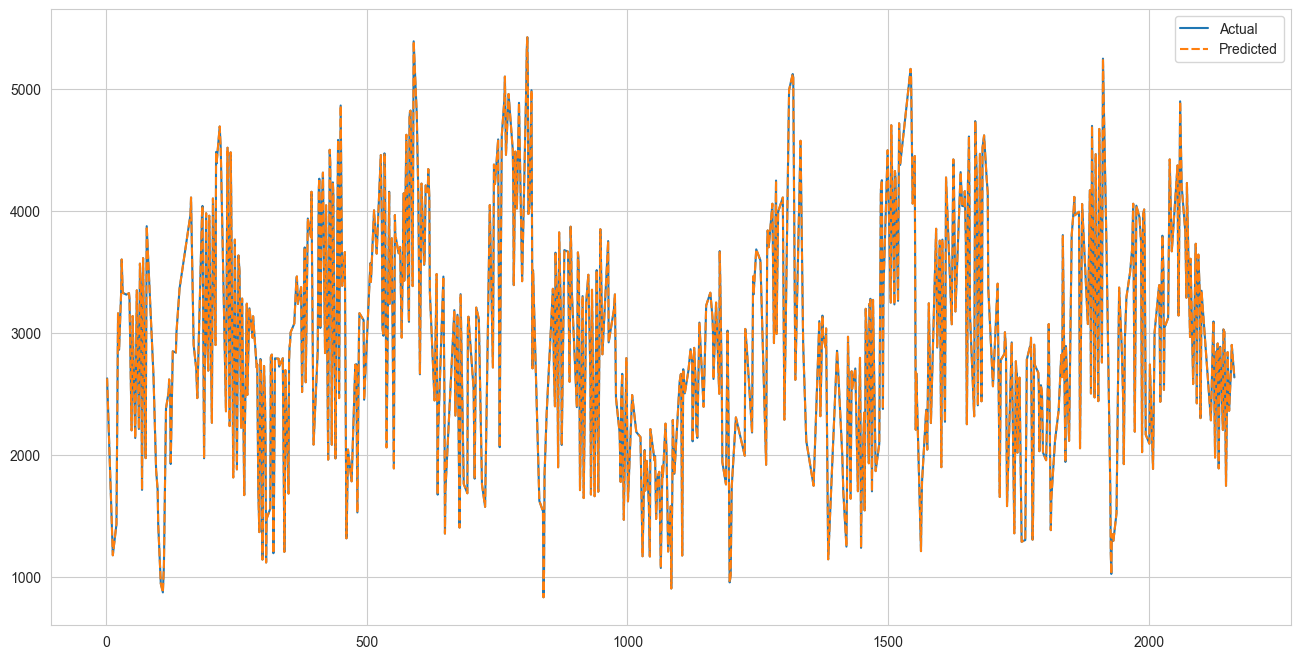

In [20]:
plt.figure(figsize=(16,8))
sns.lineplot(data=lr2)

In [21]:
regressor2.score(X_test,y_test)*100

100.0

In [22]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=1e-05)

Actual    Predicted
1486    4173  4173.783532
1602    1902  1904.847560
1460    2870  2870.181094
1134    2142  2142.904123
1513    4329  4328.316673
...      ...          ...
439     2579  2578.897313
271     2494  2493.887467
244     1818  1816.932763
1159    3332  3331.902324
1701    2565  2564.972314

[651 rows x 2 columns]

In [23]:
y_pred3 = svr_rbf.predict(X_test)

In [24]:
svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
svr  

Actual    Predicted
1486    4173  4173.783532
1602    1902  1904.847560
1460    2870  2870.181094
1134    2142  2142.904123
1513    4329  4328.316673
...      ...          ...
439     2579  2578.897313
271     2494  2493.887467
244     1818  1816.932763
1159    3332  3331.902324
1701    2565  2564.972314

[651 rows x 2 columns]

<Axes: >

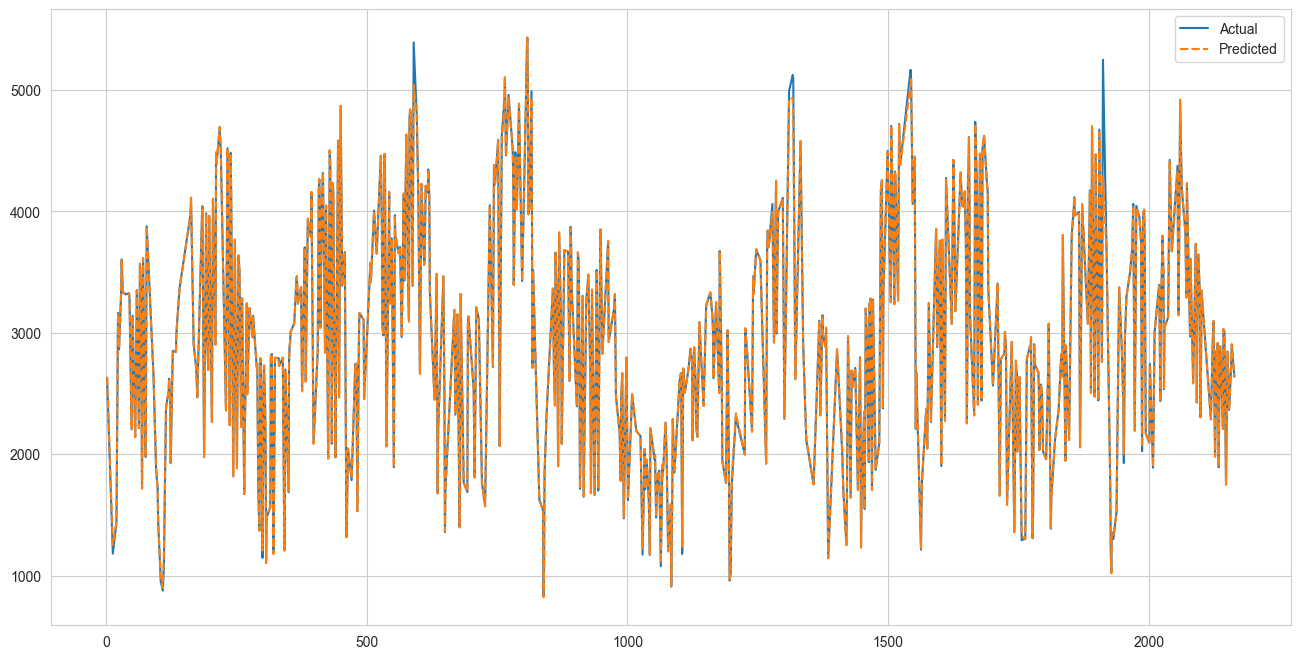

In [25]:
plt.figure(figsize=(16,8))
sns.lineplot(data=svr)

In [26]:
svr_rbf.score(X_test,y_test)

0.9980054455767926

In [27]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
xgb_pred = xgb_r.predict(X_test)

In [29]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred})
xgb_df

Actual    Predicted
1486    4173  4110.772461
1602    1902  2030.439331
1460    2870  2884.606689
1134    2142  2149.730957
1513    4329  4304.373535
...      ...          ...
439     2579  2559.423584
271     2494  2525.168701
244     1818  1889.958374
1159    3332  3347.369385
1701    2565  2577.004395

[651 rows x 2 columns]

<Axes: >

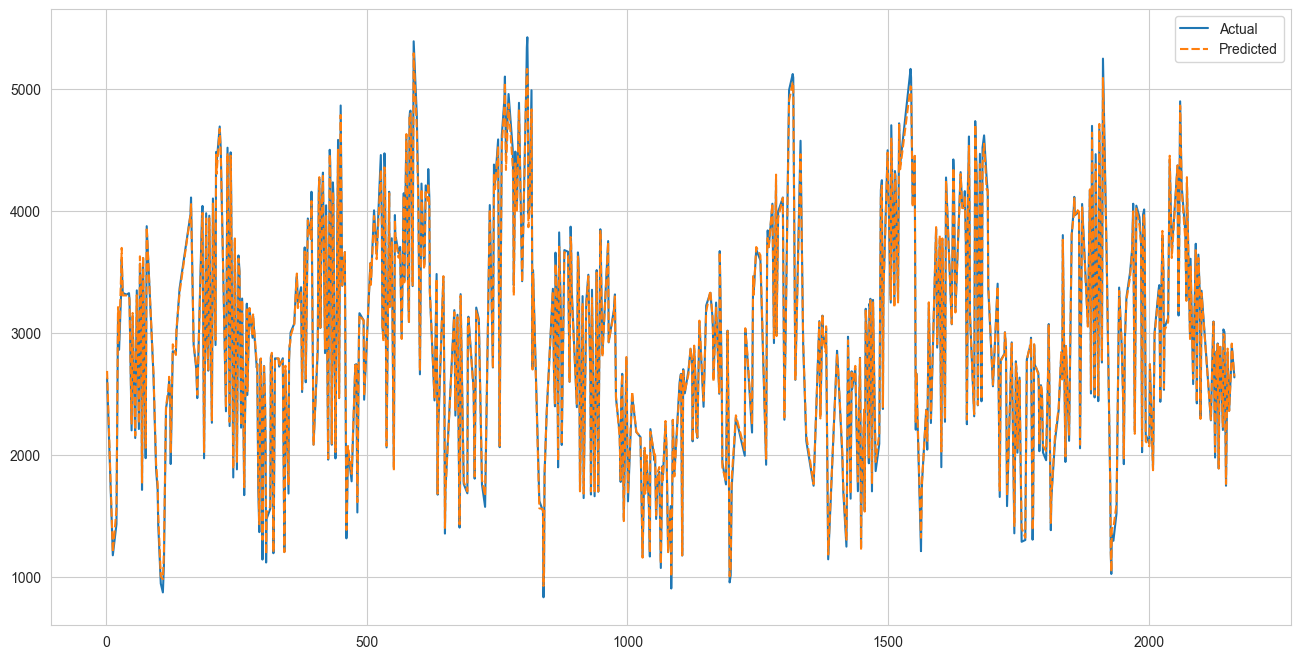

In [30]:
plt.figure(figsize=(16,8))
sns.lineplot(data=xgb_df)


In [31]:
xgb_r.score(X_test,y_test)*100

99.7781428024197

In [32]:
fig = px.histogram(
    x=[xgb_pred, y_pred3, y_pred2],  # List of arrays containing predicted values
    marginal='rug',  # Add marginal rug plots on x-axis
    color_discrete_sequence=['blue', 'green', 'red'],  # Define colors for each histogram
    labels={'x': 'Predicted Values', 'y': 'Frequency'},  # Set axis labels
    title='Histogram of Predicted Values'  # Set plot title
)

# Show the histogram
fig.show()

In [33]:
trace_lr = go.Scatter(x=y_test, y=y_pred2, mode='markers', name='LR', marker=dict(color='blue'))
trace_xgb = go.Scatter(x=y_test, y=xgb_pred, mode='markers', name='XGBoost', marker=dict(color='green'))
trace_dt = go.Scatter(x=y_test, y=y_pred3, mode='markers', name='Decision Tree', marker=dict(color='red'))

# Create layout
layout = go.Layout(
    title='Predicted Values vs True Values',
    xaxis=dict(title='True Values'),
    yaxis=dict(title='Predicted Values')
)

# Create figure
fig = go.Figure(data=[trace_lr, trace_xgb, trace_dt], layout=layout)

# Show the plot
fig.show()

In [45]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Load data
data = pd.read_csv("new_data.csv", header=0)

# Define transformers
# column_rename_mapper = {'Day.Of.Week': 'day_of_week',
#                         'Page.Loads': 'page_loads',
#                         'Unique.Visits': 'unique_visits',
#                         'First.Time.Visits': 'first_visits',
#                         'Returning.Visits': 'returning_visits'}

# replace_comma_transformer = SimpleImputer(strategy='constant', fill_value="")
# type_conversion_transformer = SimpleImputer(strategy='constant', fill_value=0)


LinearRegression1 = LinearRegression()
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.00001)
xgb_model = XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)

# Instantiate Pipeline
pipeline_lr = Pipeline([
    ('linear_regression', LinearRegression1),
    ('SVR',svr_model),
    ("XGboost",xgb_model)
])



# Split data into features and target
X = data[['page_loads', 'first_visits', 'returning_visits','days_f']]
y = data['unique_visits']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and transform the pipeline
pipeline_lr.fit(X_train, y_train)

# Make predictions
predictions_lr = pipeline_lr.predict(X_test)

print(predictions_lr)

[4173. 1902. 2870. 2142. 4329. 1738. 2742. 1622. 3498. 2675. 2574. 2948.
 1879. 3727. 1594. 3003. 3339. 4375. 3802. 4276. 4467. 4062. 1945. 3319.
 1688. 2243. 5103. 1884. 2149. 2022. 1407. 1471. 1096. 3968. 2625. 3374.
 3241. 4993. 1015. 3394. 2858. 3075. 2438. 1677. 1714. 4537. 4112. 4588.
 2783. 3145. 4251. 2304. 1934. 2857. 2841. 3135. 2837. 3340.  876. 4397.
 3240. 1975. 3673. 4160. 1440. 2663. 1509. 2794. 3273. 4520. 3151. 2057.
 2549. 2442. 2596. 4520. 4499. 3637. 2425. 3940. 2745. 2684. 3049. 2369.
 2695. 2070. 3420. 1750. 1864. 3047. 2718. 2881. 3372. 3204. 2207. 4584.
 2693. 2711. 3406. 2255. 3770. 3099. 1076. 2536. 3968. 2470. 1299. 1699.
 3825. 3221. 3035. 2726. 1808. 4061. 3974. 3348. 1740. 3759. 4086. 2845.
 2094. 4917. 3357. 3241. 3452. 2971. 2742. 2066. 3012. 4485. 2906. 2506.
 1994. 1121. 2712. 3499. 2779. 3652. 2628. 4699. 2852. 5093. 4291. 4460.
 2770. 4320. 3141. 2025. 2618. 1172. 3048. 1649. 3144. 3610. 4866. 3767.
 3464. 4045. 3995. 4202. 3178. 4900. 1996. 2853. 29

<Axes: >

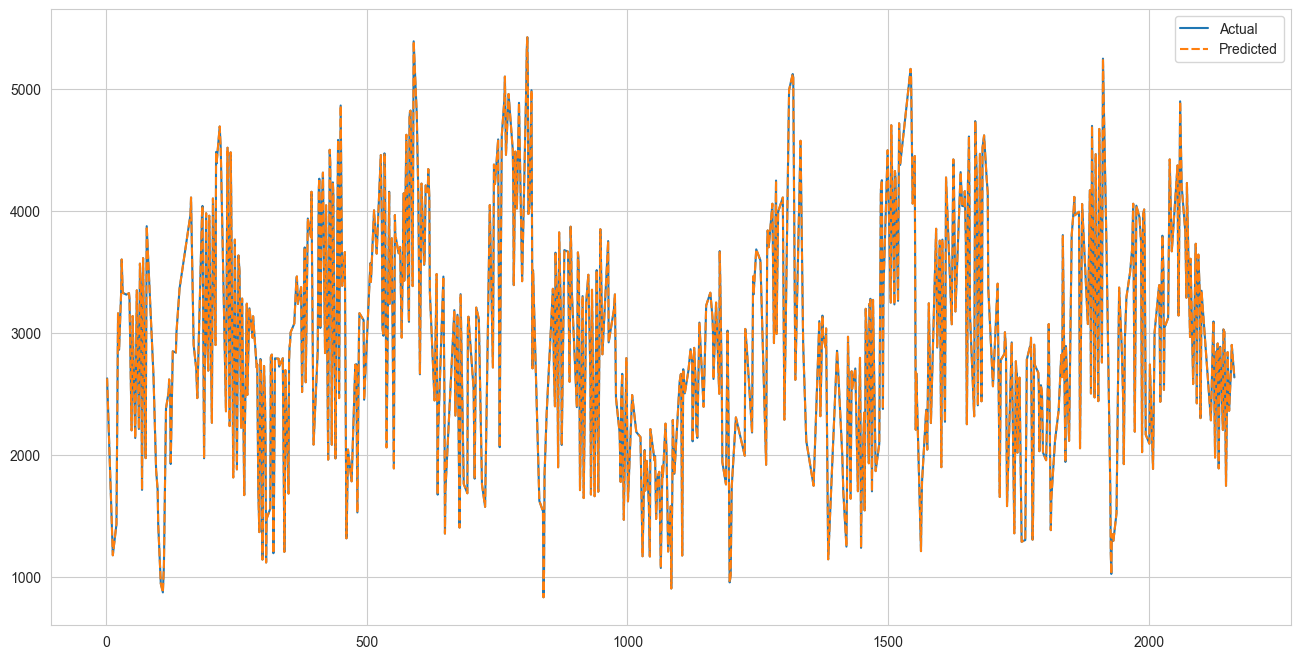

In [42]:
lr2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_lr})

plt.figure(figsize=(16,8))
sns.lineplot(data=lr2)

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(X_train, y_train)
y_pred3 = svr_rbf.predict(X_test)
svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
plt.figure(figsize=(16,8))
sns.lineplot(data=svr)